In [101]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
%autoreload 2

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import autodiff.tensor as ad

from autodiff.tensor import Variable, Tensor

# Variable

In [104]:
x = Variable(4)
y = Variable(2)
z = x * y

In [105]:
z, z.children

(8, [(2, 4), (4, 2)])

In [106]:
z.grad()

In [107]:
x.gradient, y.gradient

(2, 4)

# Tensor

## Rank

### 0

In [108]:
x = Tensor(4)
y = Tensor(2)
z = x * y

In [109]:
z, z.children

(8, [(array(2), 4), (array(4), 2)])

In [110]:
z.grad()

In [111]:
x.gradient, y.gradient

(2, 4)

### 1

#### simple vectors

In [112]:
x = Tensor([1, 2, 3])
y = Tensor([9, 8, 7])
z = x * y

In [113]:
z, z.children

([ 9 16 21], [(array([9, 8, 7]), [1 2 3]), (array([1, 2, 3]), [9 8 7])])

In [114]:
z.grad()

In [115]:
x.gradient, y.gradient

(array([9, 8, 7]), array([1, 2, 3]))

#### sin function

In [155]:
x = ad.Tensor(np.linspace(-2, 2) * np.pi)
y = ad.sin(x)

In [156]:
y.grad()

In [158]:
y.value

array([ 2.44929360e-16,  2.53654584e-01,  4.90717552e-01,  6.95682551e-01,
        8.55142763e-01,  9.58667853e-01,  9.99486216e-01,  9.74927912e-01,
        8.86599306e-01,  7.40277997e-01,  5.45534901e-01,  3.15108218e-01,
        6.40702200e-02, -1.91158629e-01, -4.33883739e-01, -6.48228395e-01,
       -8.20172255e-01, -9.38468422e-01, -9.95379113e-01, -9.87181783e-01,
       -9.14412623e-01, -7.81831482e-01, -5.98110530e-01, -3.75267005e-01,
       -1.27877162e-01,  1.27877162e-01,  3.75267005e-01,  5.98110530e-01,
        7.81831482e-01,  9.14412623e-01,  9.87181783e-01,  9.95379113e-01,
        9.38468422e-01,  8.20172255e-01,  6.48228395e-01,  4.33883739e-01,
        1.91158629e-01, -6.40702200e-02, -3.15108218e-01, -5.45534901e-01,
       -7.40277997e-01, -8.86599306e-01, -9.74927912e-01, -9.99486216e-01,
       -9.58667853e-01, -8.55142763e-01, -6.95682551e-01, -4.90717552e-01,
       -2.53654584e-01, -2.44929360e-16])

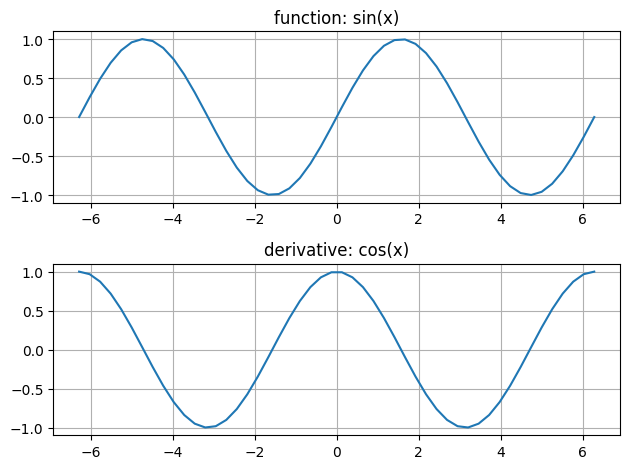

In [162]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x.value, y.value)
ax2.plot(x.value, x.gradient)

ax1.set_title('function: sin(x)')
ax2.set_title('derivative: cos(x)')

ax1.grid()
ax2.grid()

fig.tight_layout()

#### composite function

In [167]:
x = ad.Tensor(np.linspace(-2, 2, 100) * np.pi)
y = ad.exp(-x) * ad.sin(x)

In [168]:
y.grad()

In [158]:
.value

array([ 2.44929360e-16,  2.53654584e-01,  4.90717552e-01,  6.95682551e-01,
        8.55142763e-01,  9.58667853e-01,  9.99486216e-01,  9.74927912e-01,
        8.86599306e-01,  7.40277997e-01,  5.45534901e-01,  3.15108218e-01,
        6.40702200e-02, -1.91158629e-01, -4.33883739e-01, -6.48228395e-01,
       -8.20172255e-01, -9.38468422e-01, -9.95379113e-01, -9.87181783e-01,
       -9.14412623e-01, -7.81831482e-01, -5.98110530e-01, -3.75267005e-01,
       -1.27877162e-01,  1.27877162e-01,  3.75267005e-01,  5.98110530e-01,
        7.81831482e-01,  9.14412623e-01,  9.87181783e-01,  9.95379113e-01,
        9.38468422e-01,  8.20172255e-01,  6.48228395e-01,  4.33883739e-01,
        1.91158629e-01, -6.40702200e-02, -3.15108218e-01, -5.45534901e-01,
       -7.40277997e-01, -8.86599306e-01, -9.74927912e-01, -9.99486216e-01,
       -9.58667853e-01, -8.55142763e-01, -6.95682551e-01, -4.90717552e-01,
       -2.53654584e-01, -2.44929360e-16])

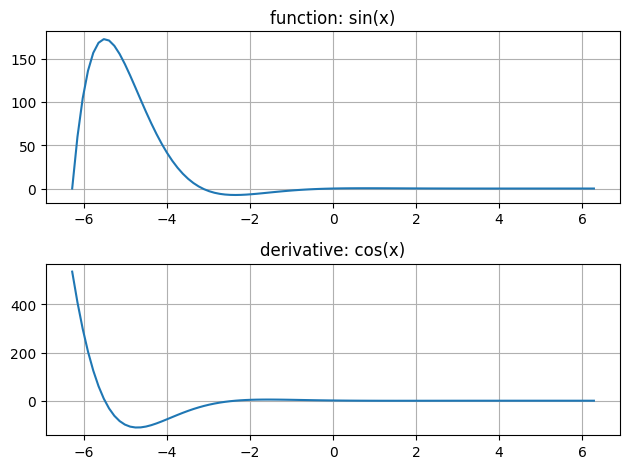

In [169]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x.value, y.value)
ax2.plot(x.value, x.gradient)

ax1.set_title('function: sin(x)')
ax2.set_title('derivative: cos(x)')

ax1.grid()
ax2.grid()

fig.tight_layout()